# Overview of the mainscripts to run the free energy exploration
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Content**
1.	raw_to_PR: 	Timeseries -> PR_timeseries (Is on harddrive)
2.	Data_to_CC: 	Timeseries + PR_timeseries -? pruned_clique_complex + entropies/mutinfo/F’s
3.	CC_to_F: 	Pruned_clique_complex + L_p -> Knill’s F (for this L_p needs to be generated before the function/loop. Matrix decompression needs to be used to select which L_p columns/rows)
4.	CC_to_minF_scipy: 	Pruned_clique_complex -> Knill’s min F from scipy P
5.	CC_to_minF_custom:	Pruned_clique_complex -> Knill’s min F from custom P

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
import math

**1 raw_to_PR: 	Timeseries -> PR_timeseries**

In [ ]:
#Put PR code here

**2.	Data_to_CC: 	Timeseries + PR_timeseries -> pruned_clique_complex + entropies/mutinfo/F’s**

In [14]:
def obtain_mutual_information(filename, max_d, number_of_variables): 

    # Import time series data
    df = pd.read_csv(filename, sep='\t', header=None)

    # Mask using the 99th and 1th percentile
    stacked_series = df.stack()
    quantile_99 = stacked_series.quantile(0.99)
    quantile_01 = stacked_series.quantile(0.01)
    df[df > quantile_99] = quantile_99
    df[df < quantile_01] = quantile_01

    # Initialize an empty DataFrame to hold discretized values
    discretized_time_series = pd.DataFrame()
    max_BOLD = df.max().max()
    min_BOLD = df.min().min()
    desired_number_of_bins = 16
    stepsize = (max_BOLD-min_BOLD)/desired_number_of_bins
    bin_edges = np.arange(min_BOLD, max_BOLD, stepsize)

    # Iterate over each column of 'df'
    for col in df.columns:
        data = df[col].tolist()
        bin_numbers = np.digitize(data, bin_edges)
        
        # Create a DataFrame with the current column's discretized values
        col_df = pd.DataFrame({col: bin_numbers}, index=df.index)
        
        # Concatenate the new DataFrame along the columns axis
        discretized_time_series = pd.concat([discretized_time_series, col_df], axis=1)

    # Import the information topology functions needed
    %run infotopo.py
    
    # Settings to use infotopo functions
    dataset = np.array(discretized_time_series).T
    work_on_transpose = False 
    nb_of_values = 16
    deformed_probability_mode = False
    supervised_mode = False
    forward_computation_mode = True
    sampling_mode = 1

    # Call infotopo functions for entropy, mutual information and free energy
    information_topo = infotopo(dimension_max = max_d, 
                                dimension_tot = number_of_variables, 
                                sample_size = 2400, 
                                work_on_transpose = work_on_transpose,
                                nb_of_values = nb_of_values, 
                                sampling_mode = sampling_mode, 
                                deformed_probability_mode = deformed_probability_mode,
                                supervised_mode = supervised_mode, 
                                forward_computation_mode = forward_computation_mode)

    Nentropie = information_topo.simplicial_entropies_decomposition(dataset) 
    Ninfomut = information_topo.simplicial_infomut_decomposition(Nentropie)
    Nfree_energy = information_topo.total_correlation_simplicial_lanscape(Nentropie)

    return Nentropie, Ninfomut, Nfree_energy

In [15]:
# Run for max_d=3 and nb_variables=60 takes about 4min
%time Nentropie, Ninfomut, Nfree_energy = obtain_mutual_information('Cyril\\100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt', 3, 10)

2024-03-31 12:56:06,910 : INFO : PROGRESS: at percent #0
2024-03-31 12:56:06,910 : INFO : PROGRESS: at percent #1
2024-03-31 12:56:06,916 : INFO : PROGRESS: at percent #1
2024-03-31 12:56:06,918 : INFO : PROGRESS: at percent #2
2024-03-31 12:56:06,920 : INFO : PROGRESS: at percent #2
2024-03-31 12:56:06,924 : INFO : PROGRESS: at percent #3
2024-03-31 12:56:06,924 : INFO : PROGRESS: at percent #4
2024-03-31 12:56:06,932 : INFO : PROGRESS: at percent #4
2024-03-31 12:56:06,934 : INFO : PROGRESS: at percent #5
2024-03-31 12:56:06,934 : INFO : PROGRESS: at percent #5
2024-03-31 12:56:06,941 : INFO : PROGRESS: at percent #6
2024-03-31 12:56:06,941 : INFO : PROGRESS: at percent #6
2024-03-31 12:56:06,950 : INFO : PROGRESS: at percent #7
2024-03-31 12:56:06,952 : INFO : PROGRESS: at percent #8
2024-03-31 12:56:06,958 : INFO : PROGRESS: at percent #8
2024-03-31 12:56:06,966 : INFO : PROGRESS: at percent #9
2024-03-31 12:56:06,966 : INFO : PROGRESS: at percent #9
2024-03-31 12:56:06,975 : INFO 

Percent of tuples processed : 0


2024-03-31 12:56:07,101 : INFO : PROGRESS: at percent #28
2024-03-31 12:56:07,101 : INFO : PROGRESS: at percent #28
2024-03-31 12:56:07,109 : INFO : PROGRESS: at percent #29
2024-03-31 12:56:07,119 : INFO : PROGRESS: at percent #29
2024-03-31 12:56:07,119 : INFO : PROGRESS: at percent #30
2024-03-31 12:56:07,119 : INFO : PROGRESS: at percent #30
2024-03-31 12:56:07,134 : INFO : PROGRESS: at percent #31
2024-03-31 12:56:07,134 : INFO : PROGRESS: at percent #32
2024-03-31 12:56:07,134 : INFO : PROGRESS: at percent #32
2024-03-31 12:56:07,134 : INFO : PROGRESS: at percent #33
2024-03-31 12:56:07,151 : INFO : PROGRESS: at percent #33
2024-03-31 12:56:07,151 : INFO : PROGRESS: at percent #34
2024-03-31 12:56:07,151 : INFO : PROGRESS: at percent #34
2024-03-31 12:56:07,166 : INFO : PROGRESS: at percent #35
2024-03-31 12:56:07,168 : INFO : PROGRESS: at percent #36
2024-03-31 12:56:07,168 : INFO : PROGRESS: at percent #36
2024-03-31 12:56:07,168 : INFO : PROGRESS: at percent #37
2024-03-31 12:

CPU times: total: 1.48 s
Wall time: 4.38 s


In [16]:
average_free_energy = sum(Nfree_energy.values())/len(Nfree_energy.values())
print(f'The average free energy of this subject is {average_free_energy}')

average_free_energy_component = sum(Ninfomut.values())/len(Ninfomut.values())
print(f'The free energy component (average mutual information) of this subject is {average_free_energy_component}')

The average free energy of this subject is 0.1462078903540543
The free energy component (average mutual information) of this subject is 0.09236833721938942


In [17]:
print(Ninfomut)
clique_complex = [frozenset(key) for key in Ninfomut if key in Ninfomut]
print(clique_complex)

{(1,): 2.3158932632922564, (2,): 2.6034634969390407, (3,): 2.2046295200496218, (4,): 2.1044846023411123, (5,): 3.0029452453336924, (6,): 2.638108973868445, (7,): 2.3989199097781473, (8,): 2.615714896072481, (9,): 2.263040738115215, (10,): 2.6811687257127006, (1, 2): 0.03881460164945061, (1, 3): 0.03208233536630356, (1, 4): 0.018709167611643096, (1, 5): 0.025890859202976735, (1, 6): 0.025290038216225774, (1, 7): 0.021381681022933918, (1, 8): 0.02069406727950529, (1, 9): 0.11753803484330305, (1, 10): 0.04036144115299489, (2, 3): 0.023696574549664895, (2, 4): 0.025942486088583294, (2, 5): 0.03453746108139466, (2, 6): 0.026589932228832325, (2, 7): 0.024578331699744993, (2, 8): 0.027395668574090593, (2, 9): 0.029919078015017142, (2, 10): 0.05743714442760517, (3, 4): 0.034541888731590475, (3, 5): 0.029368583583354813, (3, 6): 0.01869813165726608, (3, 7): 0.024930450490373346, (3, 8): 0.037263893003677495, (3, 9): 0.02045462927904662, (3, 10): 0.023421576139748268, (4, 5): 0.04398813059588047

In [18]:
Real_Nentropie, Real_Ninfomut, Real_Nfree_energy = obtain_mutual_information('Cyril\TimeSeries\REST1\REAL_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt', 3, 20)
Random_Nentropie, Random_Ninfomut, Random_Nfree_energy = obtain_mutual_information('Cyril\TimeSeries_PR\REST1\PR_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt', 3, 20)


2024-03-31 12:56:25,116 : INFO : PROGRESS: at percent #0
2024-03-31 12:56:25,151 : INFO : PROGRESS: at percent #1
2024-03-31 12:56:25,177 : INFO : PROGRESS: at percent #2
2024-03-31 12:56:25,218 : INFO : PROGRESS: at percent #3
2024-03-31 12:56:25,258 : INFO : PROGRESS: at percent #4
2024-03-31 12:56:25,289 : INFO : PROGRESS: at percent #5


Percent of tuples processed : 0


2024-03-31 12:56:25,392 : INFO : PROGRESS: at percent #6
2024-03-31 12:56:25,443 : INFO : PROGRESS: at percent #7
2024-03-31 12:56:25,477 : INFO : PROGRESS: at percent #8
2024-03-31 12:56:25,511 : INFO : PROGRESS: at percent #9
2024-03-31 12:56:25,543 : INFO : PROGRESS: at percent #10
2024-03-31 12:56:25,575 : INFO : PROGRESS: at percent #11
2024-03-31 12:56:25,609 : INFO : PROGRESS: at percent #12
2024-03-31 12:56:25,642 : INFO : PROGRESS: at percent #13
2024-03-31 12:56:25,672 : INFO : PROGRESS: at percent #14
2024-03-31 12:56:25,696 : INFO : PROGRESS: at percent #15
2024-03-31 12:56:25,743 : INFO : PROGRESS: at percent #16
2024-03-31 12:56:25,797 : INFO : PROGRESS: at percent #17
2024-03-31 12:56:25,842 : INFO : PROGRESS: at percent #18
2024-03-31 12:56:25,881 : INFO : PROGRESS: at percent #19
2024-03-31 12:56:25,925 : INFO : PROGRESS: at percent #20
2024-03-31 12:56:25,964 : INFO : PROGRESS: at percent #21
2024-03-31 12:56:26,010 : INFO : PROGRESS: at percent #22
2024-03-31 12:56:2

Percent of tuples processed : 0


2024-03-31 12:56:34,590 : INFO : PROGRESS: at percent #5
2024-03-31 12:56:34,638 : INFO : PROGRESS: at percent #6
2024-03-31 12:56:34,691 : INFO : PROGRESS: at percent #7
2024-03-31 12:56:34,753 : INFO : PROGRESS: at percent #8
2024-03-31 12:56:34,796 : INFO : PROGRESS: at percent #9
2024-03-31 12:56:34,836 : INFO : PROGRESS: at percent #10
2024-03-31 12:56:34,869 : INFO : PROGRESS: at percent #11
2024-03-31 12:56:34,899 : INFO : PROGRESS: at percent #12
2024-03-31 12:56:34,935 : INFO : PROGRESS: at percent #13
2024-03-31 12:56:34,966 : INFO : PROGRESS: at percent #14
2024-03-31 12:56:35,006 : INFO : PROGRESS: at percent #15
2024-03-31 12:56:35,050 : INFO : PROGRESS: at percent #16
2024-03-31 12:56:35,085 : INFO : PROGRESS: at percent #17
2024-03-31 12:56:35,140 : INFO : PROGRESS: at percent #18
2024-03-31 12:56:35,187 : INFO : PROGRESS: at percent #19
2024-03-31 12:56:35,223 : INFO : PROGRESS: at percent #20
2024-03-31 12:56:35,272 : INFO : PROGRESS: at percent #21
2024-03-31 12:56:35

In [19]:
print(len(Real_Ninfomut))
print(len(Random_Ninfomut))

1350
1350


In [20]:
def infomut_per_dimension(data):

    list_1 = []  # For keys of length 1
    list_2 = []  # For keys of length 2
    list_3 = []  # For keys of length 3

    for key, value in data.items():
        if len(key) == 1:
            list_1.append(value)
        elif len(key) == 2:
            list_2.append(value)
        elif len(key) == 3:
            list_3.append(value)

    return list_1, list_2, list_3

Real_I1, Real_I2, Real_I3 = infomut_per_dimension(Real_Ninfomut)
Random_I1, Random_I2, Random_I3 = infomut_per_dimension(Random_Ninfomut)

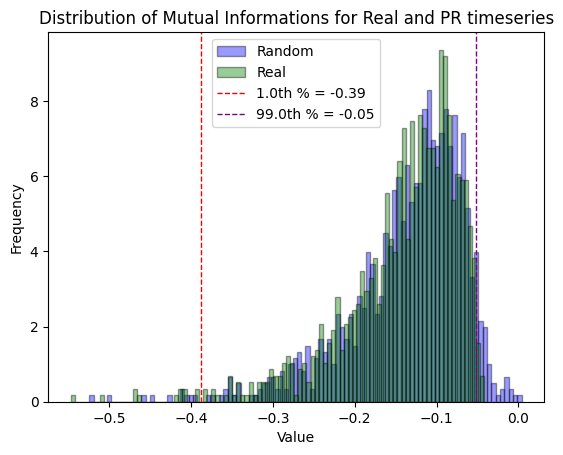

In [21]:
Real_values = Real_I3
Random_values = Random_I3

# Plot the distribution of correlation values for real vs random data
plt.hist(Real_values, bins=100, density=True, label='Random', alpha=0.4, color='blue', edgecolor='black')
plt.hist(Random_values, bins=100, density=True, label='Real', alpha=0.4, color='green', edgecolor='black')

# Calculate percentiles
q010 = np.quantile(Random_values, 0.010)
q990 = np.quantile(Random_values, 0.990)

# Draw red dotted lines at the 1.0th and 99.0th percentiles
plt.axvline(q010, color='red', linestyle='--', linewidth=1, label=f'1.0th % = {q010:.2f}')
plt.axvline(q990, color='purple', linestyle='--', linewidth=1, label=f'99.0th % = {q990:.2f}')

# Add legend to the plot
plt.legend()

# Optional: Add titles and labels
plt.title('Distribution of Mutual Informations for Real and PR timeseries')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [22]:
# Given dictionary
data = Real_Ninfomut

# Define common quantiles
quantile_min = 0.010
quantile_max = 0.990

# Initialize a dictionary to store filtered data for different key lengths
filtered_data = {}

# Loop through the data
for key_length in range(1, 4):
    # Calculate quantiles based on the key length
    I_min = np.quantile(locals()[f"Random_I{key_length}"], quantile_min)
    I_max = np.quantile(locals()[f"Random_I{key_length}"], quantile_max)
    
    # Filter data
    mask = {key: I_min <= value <= I_max for key, value in data.items()}
    filtered_data[key_length] = {key: value for key, value in data.items() if mask[key]}

# Print filtered dictionaries
print("Filtered Dictionaries:")
for key_length, filtered_dict in filtered_data.items():
    print(len(filtered_dict), ":", filtered_dict)

# Combine filtered dictionaries into one pruned_clique_complex dictionary
pruned_clique_complex = {key: value for filtered_dict in filtered_data.values() for key, value in filtered_dict.items()}
print("Pruned Clique Complex:", pruned_clique_complex)

Filtered Dictionaries:
18 : {(1,): 2.3158932632922564, (2,): 2.6034634969390407, (3,): 2.2046295200496218, (5,): 3.0029452453336924, (6,): 2.638108973868445, (7,): 2.3989199097781473, (8,): 2.615714896072481, (9,): 2.263040738115215, (10,): 2.6811687257127006, (11,): 2.1899793141189527, (12,): 2.155641706436543, (13,): 2.885945997760527, (14,): 3.4910900719042703, (15,): 2.3930486691448194, (16,): 2.5874412804506597, (17,): 3.0427341658817033, (18,): 3.2773624179080096, (19,): 3.1300593715491387}
167 : {(1, 2): 0.03881460164945061, (1, 3): 0.03208233536630356, (1, 4): 0.018709167611643096, (1, 5): 0.025890859202976735, (1, 6): 0.025290038216225774, (1, 7): 0.021381681022933918, (1, 8): 0.02069406727950529, (1, 10): 0.04036144115299489, (1, 11): 0.02312911493224945, (1, 12): 0.014466923696759615, (1, 13): 0.03097342180340057, (1, 14): 0.02840522369813403, (1, 15): 0.016433747736248172, (1, 16): 0.0231189482678813, (1, 17): 0.051723416228326435, (1, 18): 0.04699668501089693, (1, 19): 0.0

**3. CC_to_F: 	Pruned_clique_complex + L_p -> Knill’s F**

In [23]:
def count_occurrences(dicts):
    occurrences = {}
    # Iterate over all dictionaries
    for d in dicts:
        for key in d:
            occurrences[key] = occurrences.get(key, 0) + 1
    return occurrences

def generate_clique_probabilities(dict_list):  
      
    # Count occurrences
    occurrences = count_occurrences(dict_list)

    # Divide each value by the sum
    normalized_occurrences = {key: value /sum(occurrences.values()) for key, value in occurrences.items()}
    
    dict_values_list = []

    for i in range(0, len(dict_list)):
        # Initialize an empty list to store values
        values_list = []

        # Iterate over keys of dict1
        for key in dict_list[i]:
            # Check if the key exists in normalized_occurrences
            if key in normalized_occurrences:
                # If the key exists, append its corresponding value to the list
                values_list.append(normalized_occurrences[key])

        dict_values_list.append(np.array(values_list))

    return dict_values_list

In [24]:
%run Week_18_functions.py

In [30]:
# Test for some example clique_complexes
clique_complex_1 = {(1,):0.245, (2,):0.456, (1, 2): 0.123} # Put here the real pruned_clique_complex of dataset 1
clique_complex_2 = {(2,):0.767, (3,):0.178, (2, 3): 0.367} # Put here the real pruned_clique_complex of dataset 2
clique_complex_3 = {(1,):0.267, (4,):0.278, (6,): 0.128, (1, 4, 6):0.236} # Put here the real pruned_clique_complex of dataset 3 etc..
clique_complex_1 = [frozenset(key) for key in clique_complex_1 if key in clique_complex_1]
clique_complex_2 = [frozenset(key) for key in clique_complex_2 if key in clique_complex_2]
clique_complex_3 = [frozenset(key) for key in clique_complex_3 if key in clique_complex_3]
clique_complex_list = [clique_complex_1, clique_complex_2, clique_complex_3]

# Generate Free energies
F_list = []
clique_probabilities_list = generate_clique_probabilities(clique_complex_list)

for i in range(0, len(clique_complex_list)):
    clique_complex = clique_complex_list[i]
    probability = clique_probabilities_list[i]
    matrix, inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)
    F = energy_function(probability, inverse_connectivity_matrix)
    F_list.append(F)

print(F_list)

[-0.010000000000000002, 0.010000000000000002, 0.015000000000000003]


**4. CC_to_minF_scipy: 	Pruned_clique_complex -> Knill’s min F from scipy P**

In [31]:
clique_complex_list

[[frozenset({1}), frozenset({2}), frozenset({1, 2})],
 [frozenset({2}), frozenset({3}), frozenset({2, 3})],
 [frozenset({1}), frozenset({4}), frozenset({6}), frozenset({1, 4, 6})]]

In [32]:
from scipy.optimize import minimize

def complete_f_generator_scipy(clique_complex):
    Q = generate_inverse_connectivity_matrix(clique_complex)[1]

    # Optimization settings
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = [(1e-10, None) for _ in range(len(Q))]
    x0 = np.full(len(Q), 1/len(Q))  # Initial guess

    # Store the latest optimized x0 and all free energies during minimization
    latest_x0 = None
    t = 1
    all_values = []

    # Callback function to collect values during minimization
    def callback(x):
        all_values.append(free_energy_function(x, Q, t))

    #for t in t_values:
    #    result = minimize(objective, x0, args=(Q, t), method='SLSQP', constraints=cons, bounds=bounds)
    #    minimized_values.append(result.fun)
    #    latest_x0 = result.x  # Update the latest optimized x0

    result = minimize(free_energy_function, x0, args=(Q, t), method='SLSQP', constraints=cons, bounds=bounds, callback=callback)
    return [result.fun, result.x]

In [33]:
print('Using scipy the minimum free energy and the corresponding clique probabilities are', complete_f_generator_scipy(clique_complex_list[0]))

Using scipy the minimum free energy and the corresponding clique probabilities are [-0.4999999996999998, array([5.00000000e-01, 5.00000000e-01, 1.00000064e-10])]


F minmisation using custom P

In [34]:
def complete_f_generator(clique_complex):
    # Generate connection matrix and inverse
    matrix, inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)

    # Generate maximum shannon entropy from uniform distribution
    n = len(inverse_connectivity_matrix)
    p_Smax = np.ones(n) / n
    max_entropy_value = shannon_entropy(p_Smax)

    # Generate minimum internal energy from analytical solution
    min_energy_probabilities = (np.inner(matrix,[1]*len(matrix)))/np.sum(matrix)
    min_energy_value = energy_function(min_energy_probabilities, inverse_connectivity_matrix)

    temperature = 0.5 # ratio between influence of internal energy and entropy
    iterations = 1000 # number of iterations to minimise F
    free_energy_history, f_probabilities = free_energy_minimisation(clique_complex, inverse_connectivity_matrix, iterations, temperature)

    ''' IF TEMPERATURE VARIATION
    # Generate minimum free energy by custom optimisation
    f_per_T = []
    p_per_T = []
    temperature_list = [0.5] #One temperature for now, to look at a range use here: np.arange(0, 1, 1)

    for temperature in temperature_list:
        free_energy_history, f_probabilities = free_energy_minimisation(clique_complex, inverse_connectivity_matrix, 1000, temperature)
        f_per_T.append(free_energy_history[-1])
        p_per_T.append(f_probabilities)

    return [max_entropy_value, min_energy_value, f_per_T, p_per_T, temperature_list]
    '''
    return [max_entropy_value, min_energy_value, free_energy_history[-1], f_probabilities]

In [35]:
complete_f_generator(clique_complex_list[0])

[1.584962500721156,
 0.14285714285714285,
 -0.8024211874631666,
 array([0.45852179, 0.45413844, 0.08733978])]